In [3]:
#Librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#https://www.kaggle.com/datasets/masterdatasan/lung-cancer-mortality-datasets-v2

In [5]:
df = pd.read_csv("lung_cancer_mortality_data_large_v2.csv")

In [4]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0


In [7]:
# Mostrar solo tratamiento de Cancer Estado 1 que sobrevivio
df_filt1 = df[(df["cancer_stage"]== "Stage I") & (df["survived"] == 1)]
#df_filt1 = df_filt1[df_filt1["survived"] == 1]

In [8]:
#Aqui se imprime el df filtrado
df_filt1

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
16,17,48.0,Female,Portugal,2020-02-29,Stage I,2020-03-13,No,Passive Smoker,40.1,251,1,1,0,0,Surgery,2021-07-04,1
59,60,54.0,Male,Finland,2014-11-02,Stage I,2014-11-17,No,Former Smoker,39.8,299,1,0,0,0,Radiation,2016-03-18,1
90,91,72.0,Female,Sweden,2021-06-30,Stage I,2021-07-25,No,Former Smoker,35.9,257,0,0,0,0,Chemotherapy,2022-11-18,1
100,101,59.0,Male,Austria,2016-09-13,Stage I,2016-09-19,Yes,Former Smoker,45.0,244,1,0,0,0,Chemotherapy,2018-05-18,1
134,135,70.0,Male,Latvia,2022-04-27,Stage I,2022-05-03,Yes,Never Smoked,19.6,192,1,1,1,0,Radiation,2023-07-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249881,3249882,67.0,Male,Italy,2015-03-22,Stage I,2015-04-16,Yes,Passive Smoker,41.3,267,1,1,0,0,Surgery,2016-08-16,1
3249887,3249888,59.0,Male,Croatia,2022-12-06,Stage I,2022-12-22,Yes,Current Smoker,25.8,160,1,0,0,0,Radiation,2024-02-03,1
3249889,3249890,70.0,Male,Greece,2016-04-16,Stage I,2016-04-25,Yes,Former Smoker,37.4,288,1,1,0,0,Chemotherapy,2017-03-14,1
3249921,3249922,43.0,Male,Poland,2024-03-08,Stage I,2024-03-12,No,Passive Smoker,28.0,217,1,1,1,0,Combined,2025-12-07,1


In [9]:
df_agrupado_tratamiento = df.groupby('treatment_type').size().reset_index(name='count')

In [10]:
df_agrupado_tratamiento

,treatment_type,count
0,Chemotherapy,812702
1,Combined,811555
2,Radiation,812263
3,Surgery,813480


In [7]:
#convertir fechas a date time
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])

In [12]:
df

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249995,3249996,45.0,Male,Poland,2020-03-11,Stage IV,2020-03-18,No,Current Smoker,31.0,273,1,1,0,0,Chemotherapy,2020-11-26,1
3249996,3249997,51.0,Male,Italy,2016-11-16,Stage IV,2016-11-22,Yes,Current Smoker,41.2,279,1,1,0,0,Surgery,2018-04-10,0
3249997,3249998,45.0,Male,Finland,2021-07-18,Stage III,2021-07-30,Yes,Current Smoker,18.2,187,1,1,0,0,Combined,2022-03-16,0
3249998,3249999,45.0,Male,Hungary,2020-07-25,Stage I,2020-07-30,No,Passive Smoker,40.2,271,1,0,0,0,Surgery,2022-02-28,0


In [13]:
df.dtypes

id                                      int64
age                                   float64
gender                                    str
country                                   str
diagnosis_date                 datetime64[us]
cancer_stage                              str
beginning_of_treatment_date               str
family_history                            str
smoking_status                            str
bmi                                   float64
cholesterol_level                       int64
hypertension                            int64
asthma                                  int64
cirrhosis                               int64
other_cancer                            int64
treatment_type                            str
end_treatment_date             datetime64[us]
survived                                int64
dtype: object

In [9]:
#Tambien las edades a Int por que medio al dope que sean floats
df['age'] = df['age'].astype("int")

In [15]:
df

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0
1,2,50,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
2,3,65,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
3,4,51,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
4,5,37,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249995,3249996,45,Male,Poland,2020-03-11,Stage IV,2020-03-18,No,Current Smoker,31.0,273,1,1,0,0,Chemotherapy,2020-11-26,1
3249996,3249997,51,Male,Italy,2016-11-16,Stage IV,2016-11-22,Yes,Current Smoker,41.2,279,1,1,0,0,Surgery,2018-04-10,0
3249997,3249998,45,Male,Finland,2021-07-18,Stage III,2021-07-30,Yes,Current Smoker,18.2,187,1,1,0,0,Combined,2022-03-16,0
3249998,3249999,45,Male,Hungary,2020-07-25,Stage I,2020-07-30,No,Passive Smoker,40.2,271,1,0,0,0,Surgery,2022-02-28,0


In [16]:
df.dtypes

id                                      int64
age                                     int64
gender                                    str
country                                   str
diagnosis_date                 datetime64[us]
cancer_stage                              str
beginning_of_treatment_date               str
family_history                            str
smoking_status                            str
bmi                                   float64
cholesterol_level                       int64
hypertension                            int64
asthma                                  int64
cirrhosis                               int64
other_cancer                            int64
treatment_type                            str
end_treatment_date             datetime64[us]
survived                                int64
dtype: object

In [17]:
df['cholesterol_bmi_ratio'] = df['cholesterol_level'] / df['bmi']

In [18]:
df

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,cholesterol_bmi_ratio
0,1,64,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0,8.263666
1,2,50,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0,8.030888
2,3,65,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0,10.211640
3,4,51,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1,7.196532
4,5,37,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0,6.517413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249995,3249996,45,Male,Poland,2020-03-11,Stage IV,2020-03-18,No,Current Smoker,31.0,273,1,1,0,0,Chemotherapy,2020-11-26,1,8.806452
3249996,3249997,51,Male,Italy,2016-11-16,Stage IV,2016-11-22,Yes,Current Smoker,41.2,279,1,1,0,0,Surgery,2018-04-10,0,6.771845
3249997,3249998,45,Male,Finland,2021-07-18,Stage III,2021-07-30,Yes,Current Smoker,18.2,187,1,1,0,0,Combined,2022-03-16,0,10.274725
3249998,3249999,45,Male,Hungary,2020-07-25,Stage I,2020-07-30,No,Passive Smoker,40.2,271,1,0,0,0,Surgery,2022-02-28,0,6.741294


In [12]:
def categorizar_bmi(bmi):
    if bmi < 18.5:
        return("Underweight")
    elif bmi < 24.9:
        return("Normal Weight")
    elif bmi < 29.9:
        return("Overweight")
    elif bmi >= 30:
        return("Obese")

In [13]:
df["bmi_categorized"] = df["bmi"].apply(categorizar_bmi)

In [21]:
df.shape

(3250000, 20)

In [22]:
# Creo que el tema de la limpieza ya estaria

<Axes: xlabel='gender', ylabel='Count'>

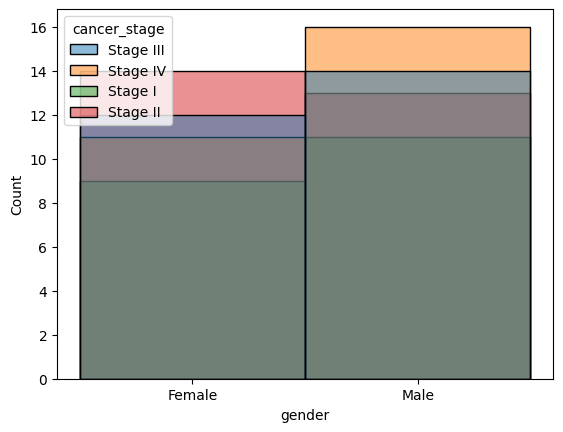

In [34]:
sns.histplot(df.head(100), x="gender", hue="cancer_stage")

In [29]:
type(df.head())

pandas.DataFrame

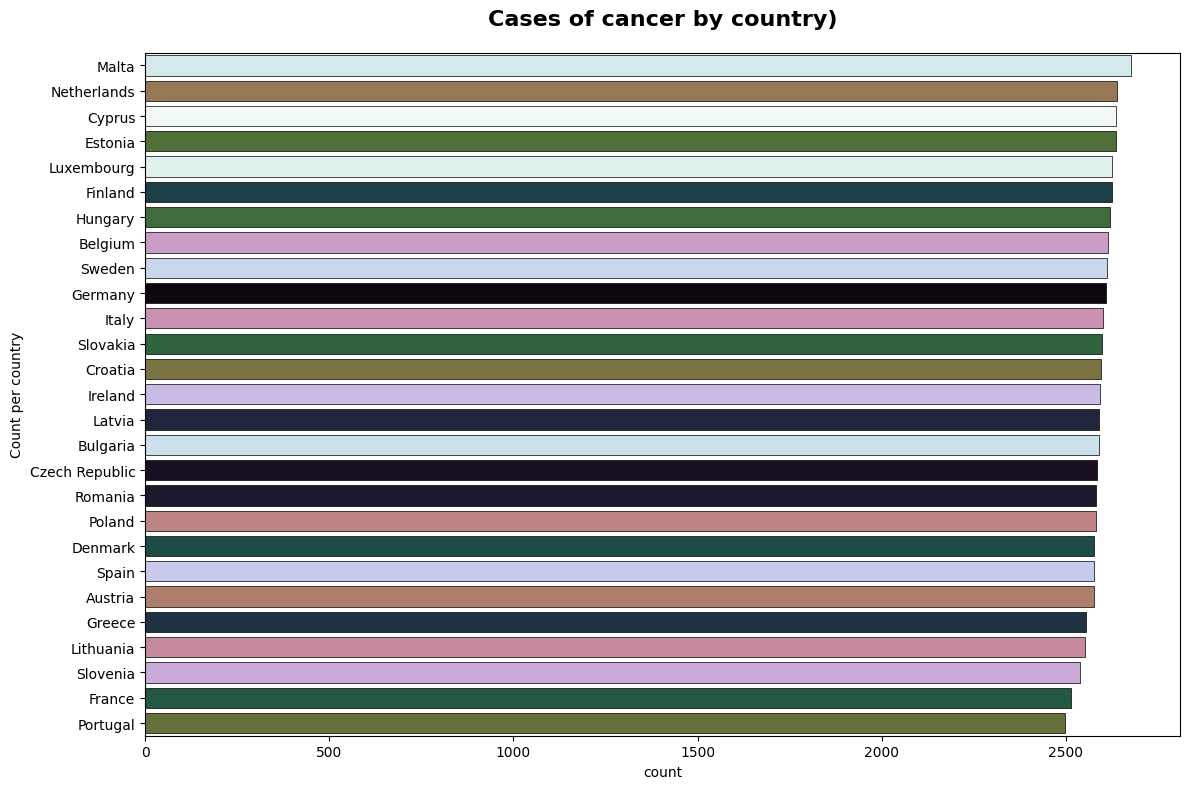

In [100]:
#Barplot con casos de cancer por pais

n = 70000

fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=df.head(n), 
              y='country',
              ax=ax,
              order=df.head(n)['country'].value_counts().index,
              palette='cubehelix',
              edgecolor='black',
              linewidth=0.5,
              legend=False,
              hue='country',
              )

ax.set_ylabel("Country")
ax.set_ylabel("Count per country")
ax.set_title('Cases of cancer by country)', 
             fontsize=16, 
             fontweight='bold',
             pad=20)
plt.tight_layout()
plt.savefig("Cases_cancer_country.png")
plt.show()




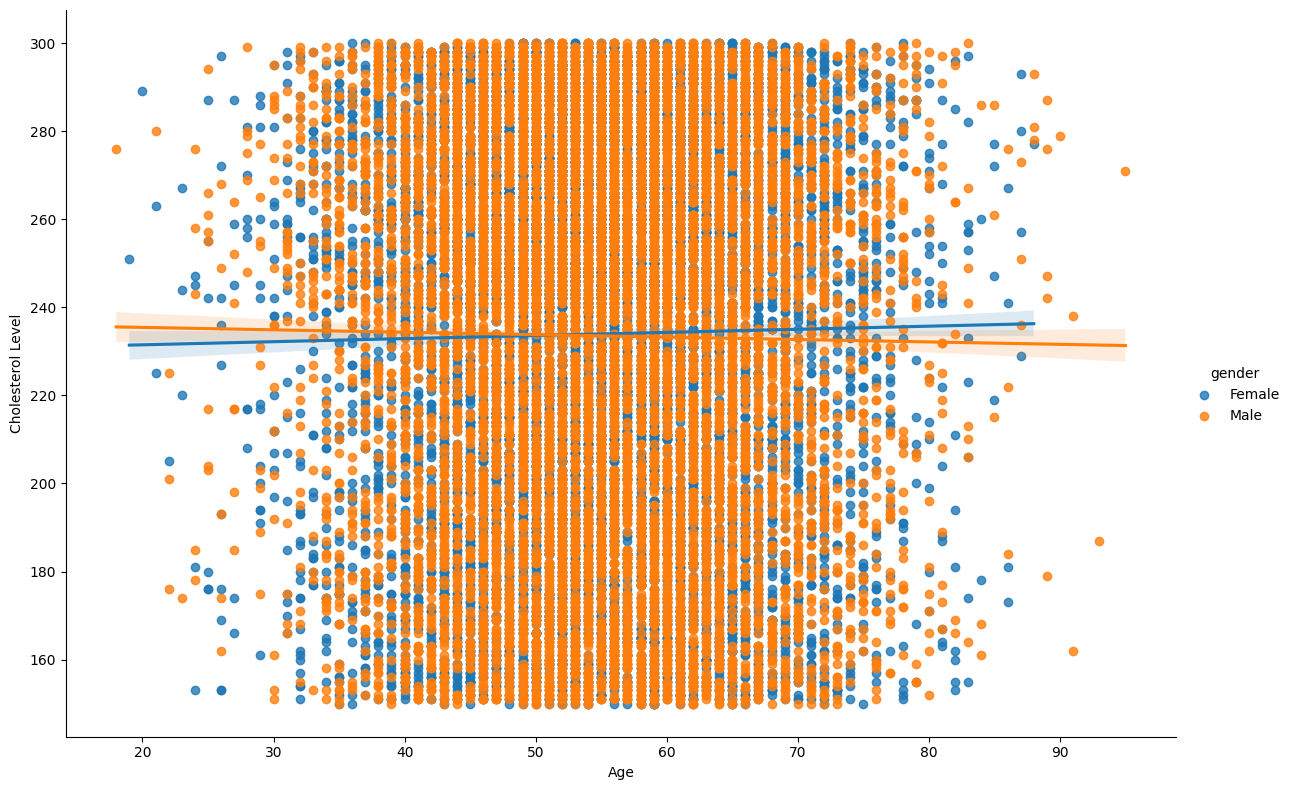

In [125]:
# Lmplot plot de...
g = sns.lmplot(data=df.head(20000), 
               x='age', 
               y='cholesterol_level',
               height=8,  # altura en pulgadas
               aspect=1.5,
               hue="gender")  # ancho = height * aspect

g.set_xlabels("Age")
g.set_ylabels("Cholesterol Level")


# Exportar
g.savefig('cholesterol_vs_age.png') 


In [126]:
# estimador condicional de Kernel por hypertension	asthma	cirrhosis

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# Crear una columna categórica combinada
df_plot = df.head(100)
df_plot['condition_count'] = df_plot[['hypertension', 'asthma', 'cirrhosis']].sum(axis=1)
df_plot['condition_group'] = pd.cut(df_plot['condition_count'], 
                                     bins=[-1, 0, 1, 3], 
                                     labels=['None', '1 condition', '2+ conditions'])

sns.kdeplot(data=df_plot, 
            x='bmi', 
            y='cholesterol_level',
            hue='condition_group',
            palette='viridis',
            alpha=0.6,
            thresh=0.05,
            ax=ax,
            fill=True)

ax.set_title('BMI vs Cholesterol by Number of Medical Conditions', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('BMI', fontsize=12)
ax.set_ylabel('Cholesterol Level', fontsize=12)
plt.tight_layout()
plt.show()

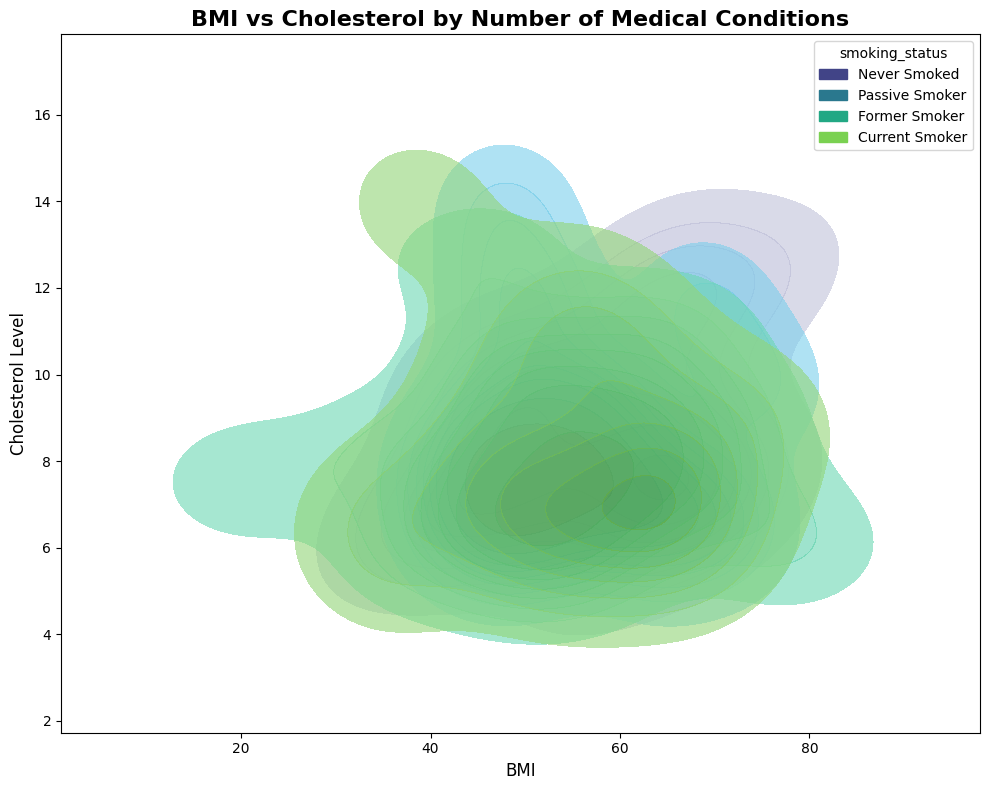

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))

# Crear una columna categórica combinada

sns.kdeplot(data=df.head(100), 
            x='age', 
            y='cholesterol_bmi_ratio',
            hue='smoking_status',
            palette='viridis',
            alpha=0.6,
            thresh=0.05,
            ax=ax,
            fill=True)

ax.set_title('BMI vs Cholesterol by Number of Medical Conditions', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('BMI', fontsize=12)
ax.set_ylabel('Cholesterol Level', fontsize=12)
plt.tight_layout()
plt.show()
#Guardar mañana

In [18]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,bmi_categorized,cholesterol_bmi_ratio
0,1,64,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0,Obese,8.263666
1,2,50,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0,Overweight,8.030888
2,3,65,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0,Normal Weight,10.211640
3,4,51,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1,Obese,7.196532
4,5,37,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0,Obese,6.517413
